<a href="https://colab.research.google.com/github/Ahmadfikriand/R-and-Python-Code/blob/master/Gaussian_Mixtures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [2]:
df = pd.read_excel('clustering_dataset.xlsx')
df

,Pembeli,x1,x2
0,1,80,4
1,2,150,6
2,3,50,2
3,4,200,8
4,5,120,5
5,6,75,3
6,7,110,5
7,8,90,4
8,9,160,7
9,10,40,1


In [3]:
df.shape

(10, 3)

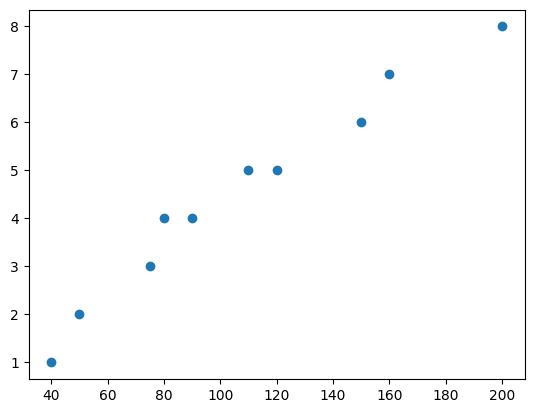

In [4]:
plt.scatter(df['x1'], df['x2'])
plt.show()

**Lakukan clustering data tersebut dalam 2 cluster menggunakan Gaussian Mixture Models (GMM)**

In [5]:
# Algoritma Gaussian Mixture Models (GMM)
k = 2
gmm = GaussianMixture(n_components=k, random_state=42)
gmm.fit(df)

GaussianMixture(n_components=2, random_state=42)

**a. Mulailah dengan inisialisasi nilai awal untuk tiap parameter GMM, seperti rata-rata (mean), covariance, dan prior probability P(j).**

In [6]:
# Parameter GMM setelah pelatihan selesai
means = gmm.means_
covariances = gmm.covariances_
weights = gmm.weights_
# Probabilitas keanggotaan untuk setiap cluster
probs = gmm.predict_proba(df)

In [7]:
print('Means: ',means)
print('Covariances: ',covariances)
print('Weights: ',weights)
print('Probs: ',probs)

Means:  [[  5.36829226 148.75311802   6.2237761 ]
 [  5.62668389  67.82043752   2.84197547]]
Covariances:  [[[ 5.90410691e+00 -1.63131864e+01 -4.28287751e-02]
  [-1.63131864e+01  1.00698068e+03  3.62011425e+01]
  [-4.28287751e-02  3.62011425e+01  1.35791039e+00]]

 [[ 1.04736794e+01 -1.37837809e+01 -1.59033409e+00]
  [-1.37837809e+01  3.83823866e+02  2.27627737e+01]
  [-1.59033409e+00  2.27627737e+01  1.42466756e+00]]]
Weights:  [0.49027861 0.50972139]
Probs:  [[3.15678835e-034 1.00000000e+000]
 [1.00000000e+000 7.60492663e-050]
 [2.41350183e-007 9.99999759e-001]
 [1.00000000e+000 2.11658319e-097]
 [1.00000000e+000 6.03636724e-012]
 [2.60221278e-015 1.00000000e+000]
 [8.95346155e-001 1.04653845e-001]
 [8.82052333e-005 9.99911795e-001]
 [1.00000000e+000 3.03492634e-015]
 [1.23227400e-137 1.00000000e+000]]


In [8]:
# Tentukan cluster untuk setiap data berdasarkan probabilitas tertinggi
clusters = np.argmax(probs, axis=1)
clusters

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1])

**b. Gunakan algoritma EM untuk menemukan parameter GMM yang optimal. Tuliskan parameter GMM setelah pelatihan selesai.**

In [9]:
# Analisis
print("Parameter GMM:")
for i in range(k):
    print(f"Cluster {i}:")
    print("Mean:", means[i])
    print("Covariance:", covariances[i])
    print("Weight:", weights[i])
    print()

Parameter GMM:
Cluster 0:
Mean: [  5.36829226 148.75311802   6.2237761 ]
Covariance: [[ 5.90410691e+00 -1.63131864e+01 -4.28287751e-02]
 [-1.63131864e+01  1.00698068e+03  3.62011425e+01]
 [-4.28287751e-02  3.62011425e+01  1.35791039e+00]]
Weight: 0.49027861468054246

Cluster 1:
Mean: [ 5.62668389 67.82043752  2.84197547]
Covariance: [[ 10.47367944 -13.7837809   -1.59033409]
 [-13.7837809  383.82386642  22.76277373]
 [ -1.59033409  22.76277373   1.42466756]]
Weight: 0.5097213853194575



**c. Tentukan probabilitas keanggotaan untuk setiap cluster.**

In [10]:
print("Cluster untuk setiap data:")
for i, cluster in enumerate(clusters):
    print(f"Pembeli {i+1}: Cluster {cluster}")

Cluster untuk setiap data:
Pembeli 1: Cluster 1
Pembeli 2: Cluster 0
Pembeli 3: Cluster 1
Pembeli 4: Cluster 0
Pembeli 5: Cluster 0
Pembeli 6: Cluster 1
Pembeli 7: Cluster 0
Pembeli 8: Cluster 1
Pembeli 9: Cluster 0
Pembeli 10: Cluster 1


**d. Tentukan cluster untuk setiap data berdasarkan probabilitas tertinggi (dengan asumsi probabilitas tertinggi > 0.5).**

In [11]:
features = ['x1','x2']
X = df[features]

In [12]:
# Membuat dan mengatur GMM
gmm = GaussianMixture(n_components=3)  # misalnya, kita ingin 3 kluster
gmm.fit(X)

# Menghitung probabilitas untuk setiap kluster
probs = gmm.predict_proba(X)

# Mengambil kluster dengan probabilitas tertinggi
clusters = probs.argmax(axis=1)

# Mengatur syarat probabilitas > 0.5
clusters[probs.max(axis=1) > 0.5]
print(clusters)

[0 1 0 1 2 0 2 0 1 0]


In [14]:
print("Cluster untuk setiap data:")
for i, cluster in enumerate(clusters):
    print(f"Pembeli {i+1}: Cluster {cluster}")

Cluster untuk setiap data:
Pembeli 1: Cluster 0
Pembeli 2: Cluster 1
Pembeli 3: Cluster 0
Pembeli 4: Cluster 1
Pembeli 5: Cluster 2
Pembeli 6: Cluster 0
Pembeli 7: Cluster 2
Pembeli 8: Cluster 0
Pembeli 9: Cluster 1
Pembeli 10: Cluster 0


**e. Berikan analisis anda terhadap hasil clustering tersebut.**

**Cluster sebelum dengan asumsi probabilitas tertinggi > 0.5:**
- Pembeli 1: Cluster 1
- Pembeli 2: Cluster 0
- Pembeli 3: Cluster 1
- Pembeli 4: Cluster 0
- Pembeli 5: Cluster 0
- Pembeli 6: Cluster 1
- Pembeli 7: Cluster 0
- Pembeli 8: Cluster 1
- Pembeli 9: Cluster 0
- Pembeli 10: Cluster 1

**Cluster dengan asumsi probabilitas tertinggi > 0.5:**
Cluster untuk setiap data:
- Pembeli 1: Cluster 0
- Pembeli 2: Cluster 1
- Pembeli 3: Cluster 0
- Pembeli 4: Cluster 1
- Pembeli 5: Cluster 2
- Pembeli 6: Cluster 0
- Pembeli 7: Cluster 2
- Pembeli 8: Cluster 0
- Pembeli 9: Cluster 1
- Pembeli 10: Cluster 0

Dapat dilihat semua pembeli mempunyai cluster yang berbeda setelah diberikan perubahan asumsi probabilitas. Dan pada percobaan clustering kedua, terdapat pembeli yang menempati cluster 2 sedangkan pada percobaan pertama tidak ada.












